In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv("tv_shows.csv")
df

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [19]:
new_df=df[df.IMDb.notna()]
new_df=new_df[new_df.Age.notna()]
new_df=new_df[new_df["Rotten Tomatoes"].notna()]
new_df.reset_index(inplace=True)
#new_df.isnull().sum()
new_df

,index,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
926,5509,5509,Diary of a Future President,2020,7+,5.5,100%,0,0,0,1,1
927,5517,5517,Encore!,2019,7+,7.4,68%,0,0,0,1,1
928,5522,5522,Spider-Man Unlimited,1999,7+,6.5,50%,0,0,0,1,1
929,5530,5530,The Super Hero Squad Show,2009,7+,6.1,50%,0,0,0,1,1


In [25]:
new_df[(new_df["Age"]=="18+") & (new_df["IMDb"] > 8)].sort_values(by='IMDb', ascending=False).head()

,index,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
738,3567,3567,Band of Brothers,2001,18+,9.4,94%,0,0,1,0,1
737,3566,3566,The Wire,2002,18+,9.3,94%,0,0,1,0,1
416,1931,1931,Rick and Morty,2013,18+,9.2,94%,0,1,0,0,1
739,3568,3568,The Sopranos,1999,18+,9.2,92%,0,0,1,0,1


In [27]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

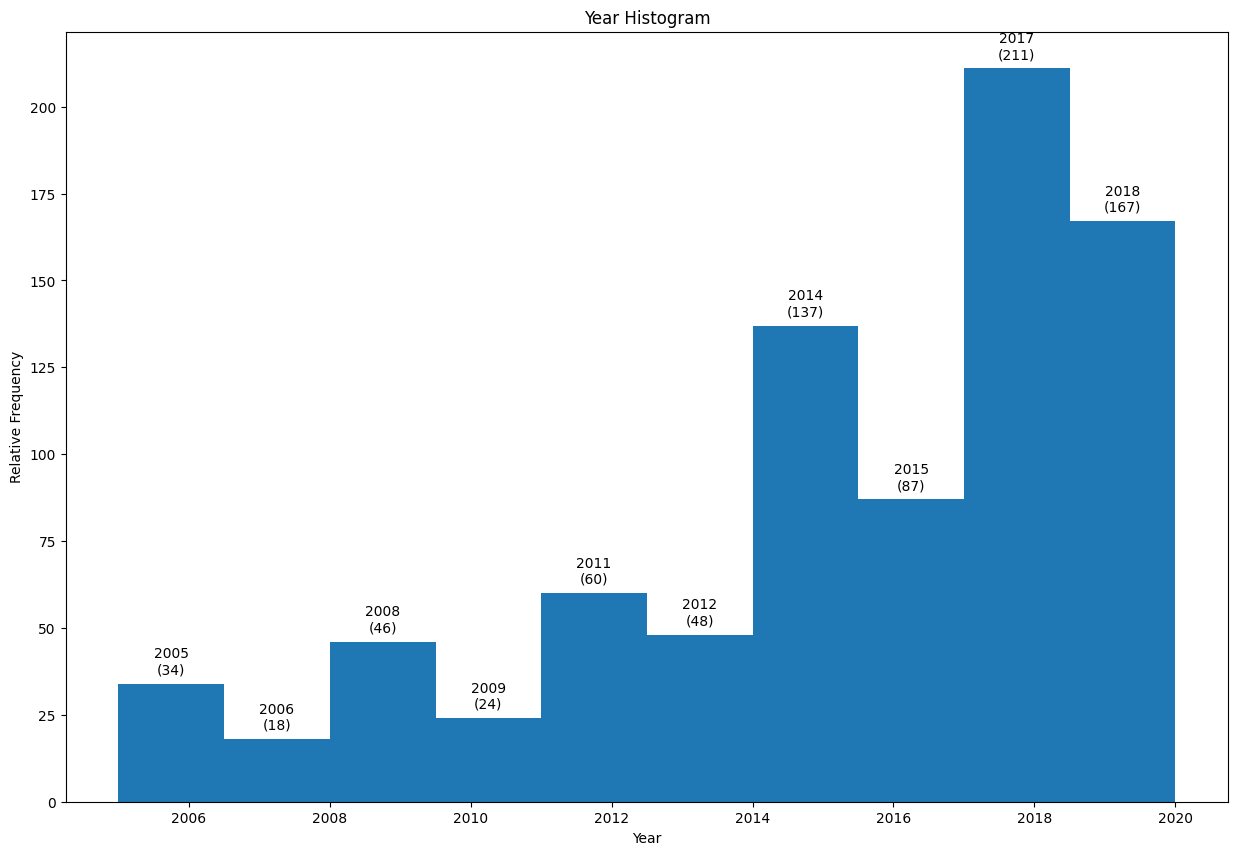

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(new_df[new_df.Year>=2005].Year,bins=10, density=False)
plt.xlabel("Year")
plt.ylabel("Relative Frequency")
plt.title("Year Histogram")

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(rect.get_x())}\n({int(height)})', xy=(rect.get_x()+rect.get_width()/2, height),xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()

# Ratings Comparison Boxplot

In [ ]:
fig,ax = plt.subplots()
bp_data=[IMDb_rating*10,RT_rating]
ax.boxplot(bp_data)
ax.set_xticklabels(["IMDb","Rotten tomatoes"])
plt.ylabel("Relative Ratings(Scale 0-100)")
plt.title("Ratings Boxplot")
plt.show()